<a href="https://colab.research.google.com/github/iris-obed/AI-Data-Engineer-Assignments/blob/master/Credit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem 1**:Understanding the content of the competition

#**1. What kind of company is Home Credit?**
Home Credit is a financial services company that focuses on providing loans to individuals who may have insufficient or non-existent credit histories. The company aims to broaden financial inclusion for the unbanked population by offering a positive and safe borrowing experience. Home Credit utilizes alternative data, such as telco and transactional information, to assess clients' repayment abilities, especially for those who might be excluded from traditional banking systems.

#**2. What do you predict for this competition?**
In this competition, participants are tasked with predicting whether a client will have difficulty repaying a loan. Specifically, the goal is to predict the probability that a client will default on their loan (i.e., have a late payment of more than a certain number of days on at least one of the first few installments). The target variable is binary:

1: Client with payment difficulties.

0: Client without payment difficulties.


#**3. What benefits can companies gain from predicting this?**
Predicting loan default risk provides several benefits to companies like Home Credit:

**Risk Mitigation**: By identifying high-risk clients, the company can avoid granting loans to individuals who are likely to default, reducing financial losses.

**Better Decision-Making**: Accurate predictions enable more informed lending decisions, balancing risk and opportunity.

**Financial Inclusion**: The use of alternative data allows the company to serve underserved populations who lack traditional credit histories, expanding their customer base.

**Operational Efficiency**: Automating the risk assessment process with machine learning can streamline operations and reduce manual review costs.

**Competitive Advantage**: Leveraging advanced predictive models can differentiate the company from competitors by offering more tailored and reliable loan products.

=== Home Credit Default Risk Competition Analysis ===
Data loaded successfully!

1. Home Credit is a financial services provider specializing in loans
for individuals with limited or no credit history, using alternative
data sources for risk assessment.

2. The goal is to predict the probability of a client having payment
difficulties (TARGET=1 for default, TARGET=0 for successful repayment).

3. Business benefits for Home Credit:
- Reduced credit risk through better default prediction
- More informed lending decisions
- Financial inclusion for underserved populations
- Operational efficiency through automation
- Competitive advantage with advanced ML models

=== Basic Dataset Information ===
Total rows: 17474
Total columns: 122

First 5 rows:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loan

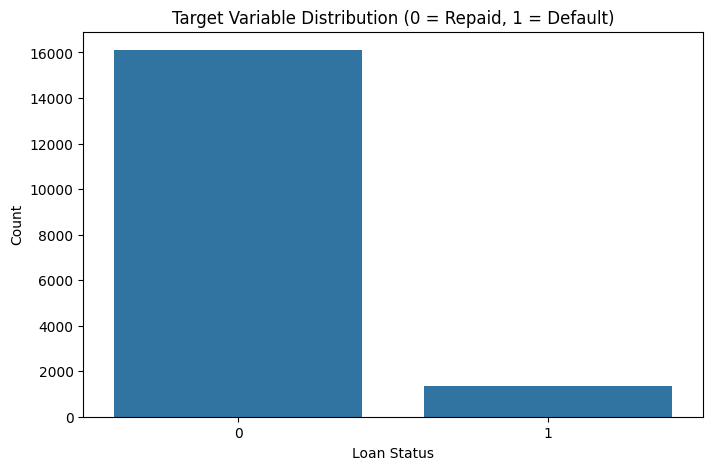


=== Key Features Analysis ===


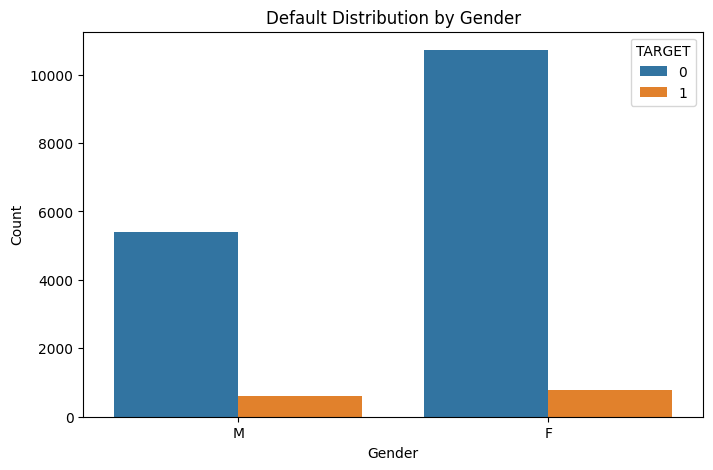

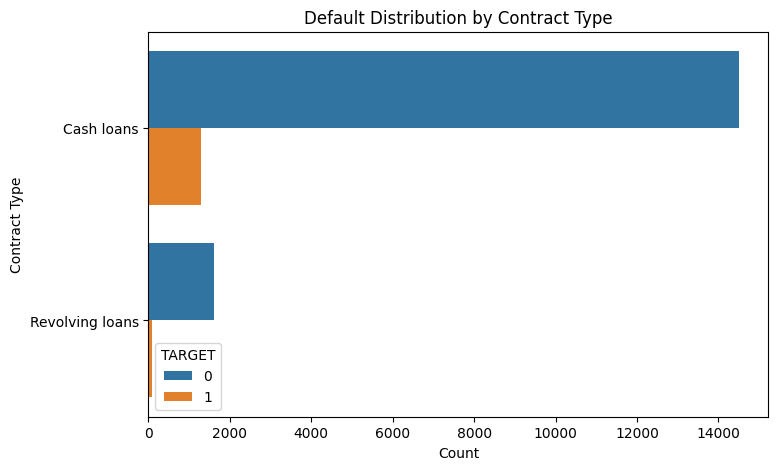

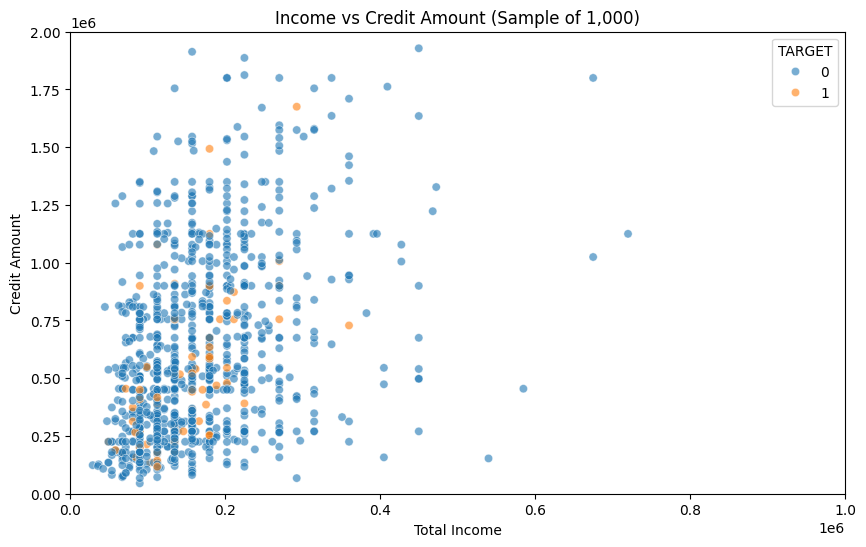

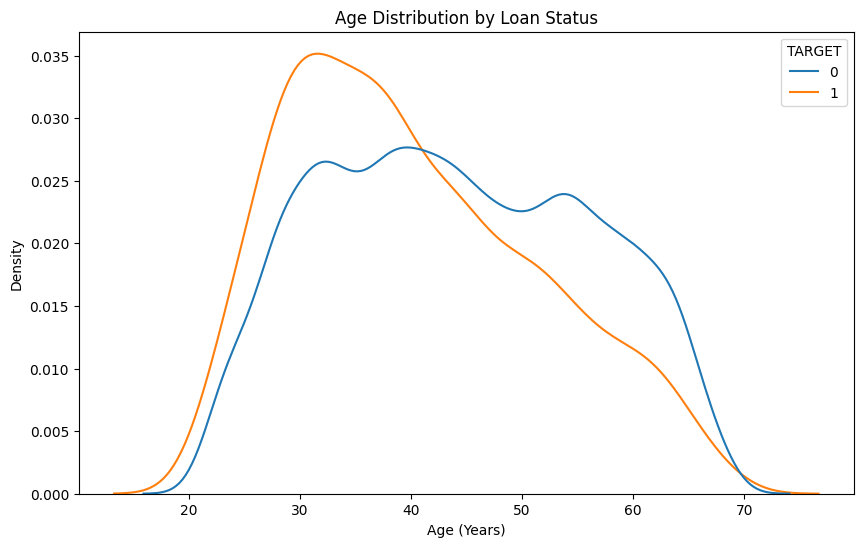

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
def load_data():
    try:
        # Load main training data
        df = pd.read_csv('application_train.csv')

        # Load column descriptions
        col_desc = pd.read_csv('HomeCredit_columns_description.csv', encoding='latin1')

        print("Data loaded successfully!")
        return df, col_desc
    except FileNotFoundError:
        print("File not found. Please verify file paths.")
        return None, None

# Basic exploratory data analysis
def basic_eda(df):
    print("\n=== Basic Dataset Information ===")
    print(f"Total rows: {df.shape[0]}")
    print(f"Total columns: {df.shape[1]}")
    print("\nFirst 5 rows:")
    print(df.head())

    print("\nData types:")
    print(df.dtypes.value_counts())

    print("\nMissing values by column:")
    missing = df.isnull().sum().sort_values(ascending=False)
    print(missing[missing > 0].head(10))

# Target variable analysis
def analyze_target(df):
    print("\n=== Target Variable Analysis ===")
    target_dist = df['TARGET'].value_counts(normalize=True)
    print("Target variable distribution:")
    print(target_dist)

    plt.figure(figsize=(8, 5))
    sns.countplot(x='TARGET', data=df)
    plt.title('Target Variable Distribution (0 = Repaid, 1 = Default)')
    plt.xlabel('Loan Status')
    plt.ylabel('Count')
    plt.show()

#  features analysis
def analyze_key_features(df):
    print("\n=== Key Features Analysis ===")

    # Gender analysis
    plt.figure(figsize=(8, 5))
    sns.countplot(x='CODE_GENDER', hue='TARGET', data=df)
    plt.title('Default Distribution by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

    # Contract type analysis
    plt.figure(figsize=(8, 5))
    sns.countplot(y='NAME_CONTRACT_TYPE', hue='TARGET', data=df)
    plt.title('Default Distribution by Contract Type')
    plt.xlabel('Count')
    plt.ylabel('Contract Type')
    plt.show()

    # Income vs Credit amount
    plt.figure(figsize=(10, 6))
    sample_df = df.sample(1000)  # Use sample for better visualization
    sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET',
                    data=sample_df, alpha=0.6)
    plt.title('Income vs Credit Amount (Sample of 1,000)')
    plt.xlabel('Total Income')
    plt.ylabel('Credit Amount')
    plt.xlim(0, 1e6)  # Set limits for better visualization
    plt.ylim(0, 2e6)
    plt.show()

    # Age analysis (convert days to years)
    df['AGE_YEARS'] = df['DAYS_BIRTH'] / -365
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x='AGE_YEARS', hue='TARGET', common_norm=False)
    plt.title('Age Distribution by Loan Status')
    plt.xlabel('Age (Years)')
    plt.ylabel('Density')
    plt.show()

# Main function
def main():
    print("=== Home Credit Default Risk Competition Analysis ===")

    # Load data
    df, col_desc = load_data()
    if df is None:
        return

    #  What kind of company is Home Credit?
    print("\n1. Home Credit is a financial services provider specializing in loans")
    print("for individuals with limited or no credit history, using alternative")
    print("data sources for risk assessment.")

    # What do we predict in this competition?
    print("\n2. The goal is to predict the probability of a client having payment")
    print("difficulties (TARGET=1 for default, TARGET=0 for successful repayment).")

    #  Business benefits
    print("\n3. Business benefits for Home Credit:")
    print("- Reduced credit risk through better default prediction")
    print("- More informed lending decisions")
    print("- Financial inclusion for underserved populations")
    print("- Operational efficiency through automation")
    print("- Competitive advantage with advanced ML models")

    # Data analysis
    basic_eda(df)
    analyze_target(df)
    analyze_key_features(df)

if __name__ == "__main__":
    main()

#**Problem 2:** Understanding the overview of data

=== Problem 2: Data Overview Analysis ===
Data loaded successfully!

=== 1. First 5 Rows ===
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_1

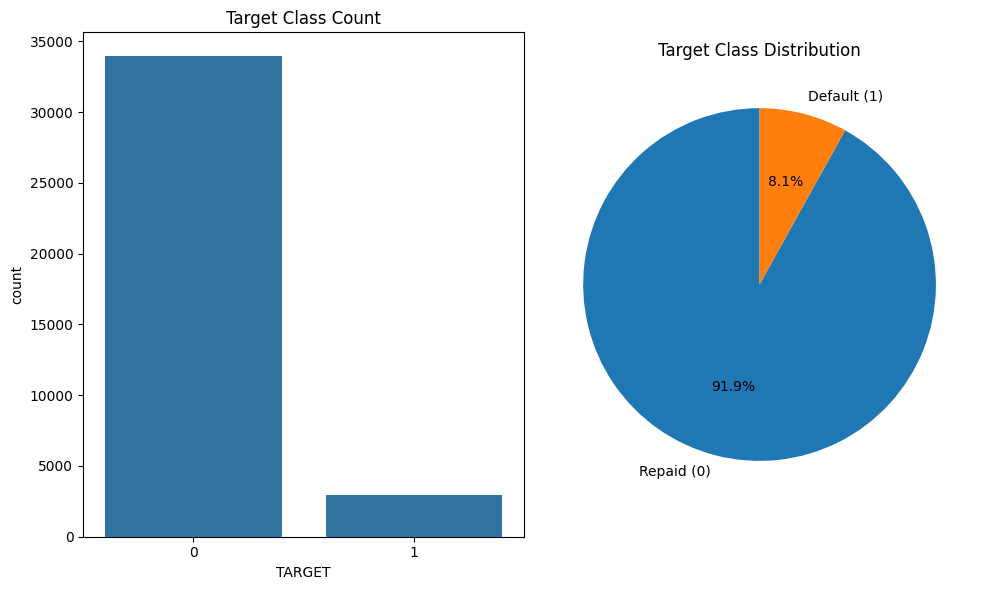

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data():
    #Load the dataset with error handling
    try:
        df = pd.read_csv('application_train.csv')
        print("Data loaded successfully!")
        return df
    except FileNotFoundError:
        print("Error: File 'application_train.csv' not found.")
        return None

def data_overview(df):
    #Perform comprehensive data overview analysis

    print("\n=== 1. First 5 Rows ===")
    print(df.head())

    print("\n=== 2. Dataset Information ===")
    print(df.info())

    print("\n=== 3. Statistical Summary ===")
    print(df.describe(include='all'))

    print("\n=== 4. Missing Values Analysis ===")
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage (%)': missing_percent
    }).sort_values('Percentage (%)', ascending=False)

    print(missing_df[missing_df['Missing Values'] > 0].head(20))

    print("\n=== 5. Target Class Distribution ===")
    target_dist = df['TARGET'].value_counts(normalize=True) * 100
    print(target_dist)

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(x='TARGET', data=df)
    plt.title('Target Class Count')

    plt.subplot(1, 2, 2)
    plt.pie(target_dist, labels=['Repaid (0)', 'Default (1)'],
            autopct='%1.1f%%', startangle=90)
    plt.title('Target Class Distribution')
    plt.tight_layout()
    plt.show()

def main():
    print("=== Problem 2: Data Overview Analysis ===")
    df = load_data()
    if df is not None:
        data_overview(df)

if __name__ == "__main__":
    main()

#**Problem 3**: Setting the problem

=== Problem 3: Defining Key Issues and Questions ===

=== Key Issues and Questions ===

1. Class Imbalance Issue:
- The target variable shows extreme imbalance (typically 8% default vs 92% repaid)
- Questions:
  * How will we handle this imbalance? (class weights, resampling, etc.)
  * What evaluation metrics should we prioritize? (AUC, F1, precision/recall)


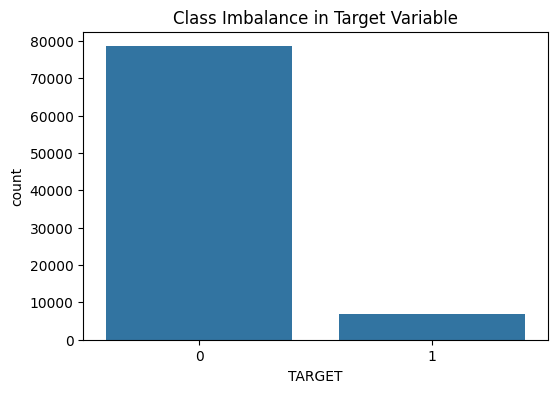


2. Missing Data Issues:
- 87 columns have missing values
- Questions:
  * Which missing data patterns are meaningful vs random?
  * Should we impute, drop, or create missingness indicators?


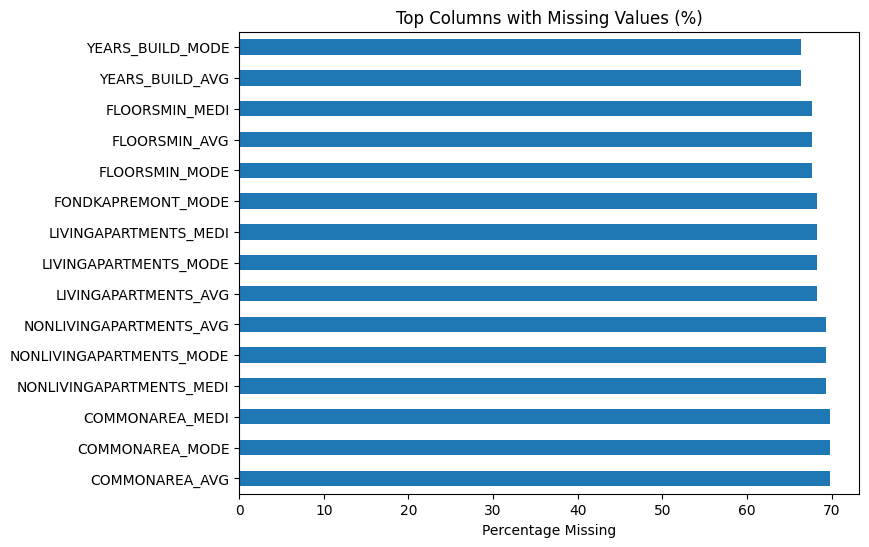


3. Feature Engineering Questions:
- Can we create better predictive features from existing ones?
  * Income-to-credit ratio
  * Payment-to-income ratio
  * Credit utilization features
  * Temporal features from days columns

4. Data Quality Questions:
- Are there outliers or impossible values?
- Are categorical variables properly encoded?
- Do we need to handle skewed distributions?

5. Business-Specific Questions:
- Which client segments have highest default risk?
- What are the most important risk factors?
- Can we identify 'gray area' applicants where our model adds most value?

6. Modeling Strategy Questions:
- Should we use traditional ML or deep learning?
- How to handle categorical variables?
- Should we use feature selection?
- How to ensure model interpretability?


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def identify_key_issues(df):
    """Identify and visualize key problems and questions for the dataset"""

    print("\n=== Key Issues and Questions ===")

    #  Class Imbalance Problem
    print("\n1. Class Imbalance Issue:")
    print("- The target variable shows extreme imbalance (typically 8% default vs 92% repaid)")
    print("- Questions:")
    print("  * How will we handle this imbalance? (class weights, resampling, etc.)")
    print("  * What evaluation metrics should we prioritize? (AUC, F1, precision/recall)")

    # Visualize class imbalance
    plt.figure(figsize=(6, 4))
    sns.countplot(x='TARGET', data=df)
    plt.title('Class Imbalance in Target Variable')
    plt.show()

    # Missing Data Problem
    print("\n2. Missing Data Issues:")
    missing_values = df.isnull().sum().sort_values(ascending=False)
    missing_pct = (missing_values / len(df)) * 100
    print(f"- {len(missing_pct[missing_pct > 0])} columns have missing values")
    print("- Questions:")
    print("  * Which missing data patterns are meaningful vs random?")
    print("  * Should we impute, drop, or create missingness indicators?")

    # Plot missing data
    missing_pct[missing_pct > 0].head(15).plot(kind='barh', figsize=(8, 6))
    plt.title('Top Columns with Missing Values (%)')
    plt.xlabel('Percentage Missing')
    plt.show()

    # Feature Engineering Opportunities
    print("\n3. Feature Engineering Questions:")
    print("- Can we create better predictive features from existing ones?")
    print("  * Income-to-credit ratio")
    print("  * Payment-to-income ratio")
    print("  * Credit utilization features")
    print("  * Temporal features from days columns")

    # Data Quality Issues
    print("\n4. Data Quality Questions:")
    print("- Are there outliers or impossible values?")
    print("- Are categorical variables properly encoded?")
    print("- Do we need to handle skewed distributions?")

    # 5. Business-Specific Questions
    print("\n5. Business-Specific Questions:")
    print("- Which client segments have highest default risk?")
    print("- What are the most important risk factors?")
    print("- Can we identify 'gray area' applicants where our model adds most value?")

    # Model Selection Considerations
    print("\n6. Modeling Strategy Questions:")
    print("- Should we use traditional ML or deep learning?")
    print("- How to handle categorical variables?")
    print("- Should we use feature selection?")
    print("- How to ensure model interpretability?")

def main():
    print("=== Problem 3: Defining Key Issues and Questions ===")
    df = pd.read_csv('application_train.csv')
    identify_key_issues(df)

if __name__ == "__main__":
    main()

#**Problem 4**: Data exploration

=== Problem 4: Data Exploration ===

1. Analyzing Default Rates by Age...


<ipython-input-9-7c40fddbda9c>:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df.groupby('AGE_BIN')['TARGET'].mean().reset_index()
<ipython-input-9-7c40fddbda9c>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AGE_BIN', y='TARGET', data=age_analysis, palette='viridis')


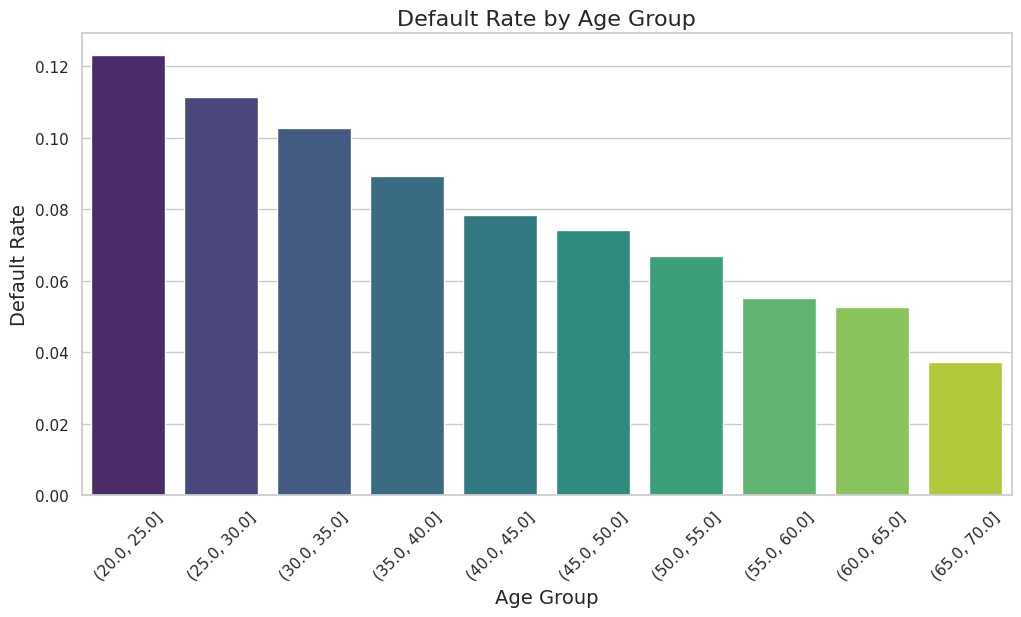


New Question: Why do younger applicants have higher default rates?
Is this due to less stable employment or different loan purposes?

2. Analyzing Income vs Credit Amount...


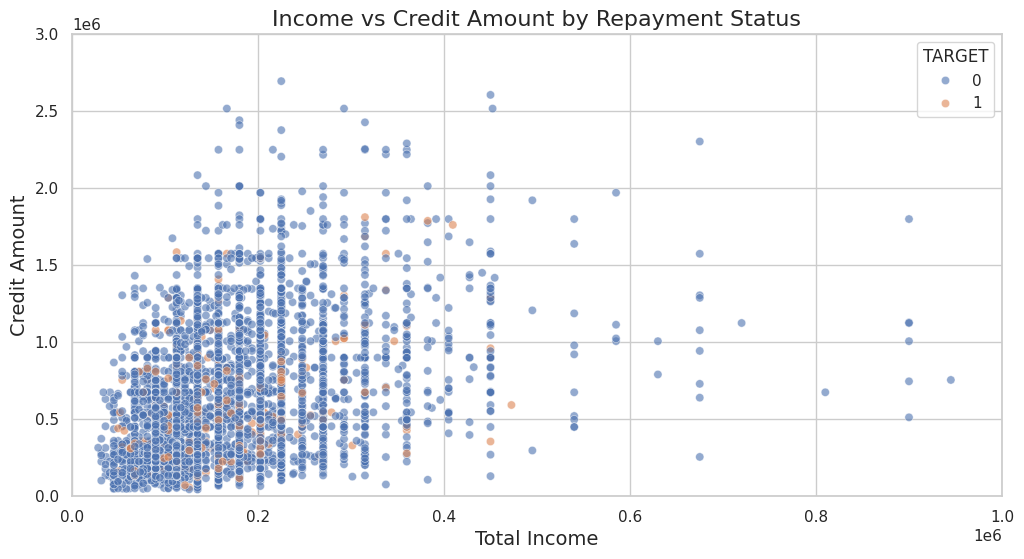


New Question: What's the optimal credit-to-income ratio threshold?
Should we create different risk models for different income brackets?

3. Analyzing Debt-to-Income Ratios...


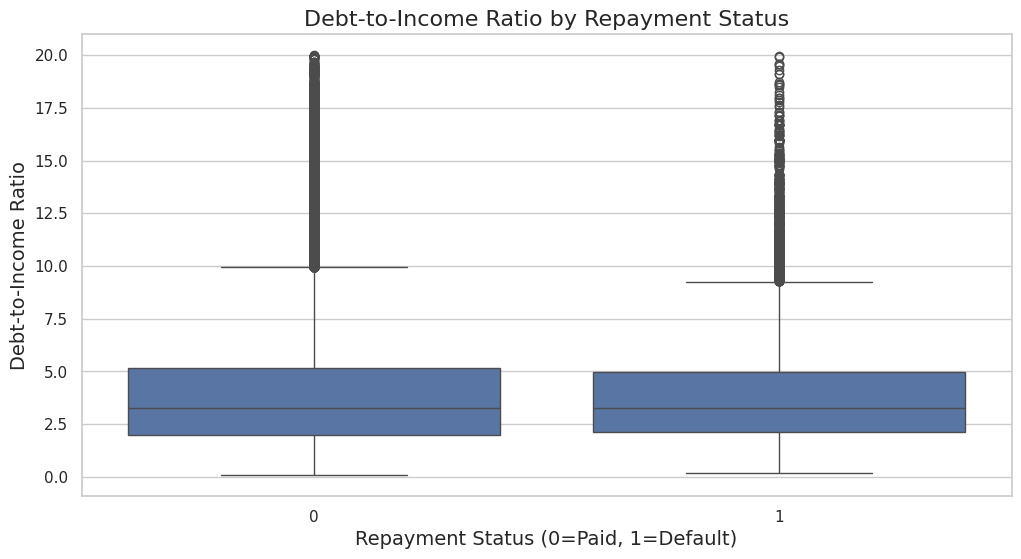


T-test results: t-statistic = 4.91, p-value = 0.0000
The difference in debt-to-income ratios is statistically significant

4. Analyzing Employment Status Impact...


<ipython-input-9-7c40fddbda9c>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EMP_STATUS', y='TARGET', data=emp_analysis,


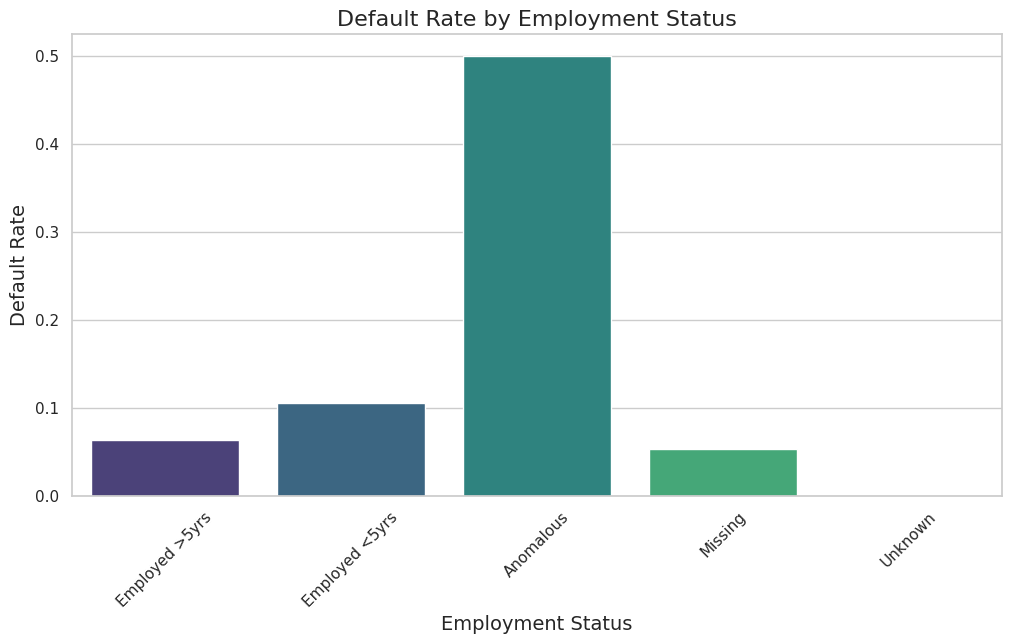


New Question: Why do applicants with missing employment data have higher risk?
Is employment data missing for specific occupations or income types?

5. Analyzing Credit Types...

Credit Type Analysis:
                    Default Rate   Count
NAME_CONTRACT_TYPE                      
Cash loans              0.083459  278232
Revolving loans         0.054783   29279


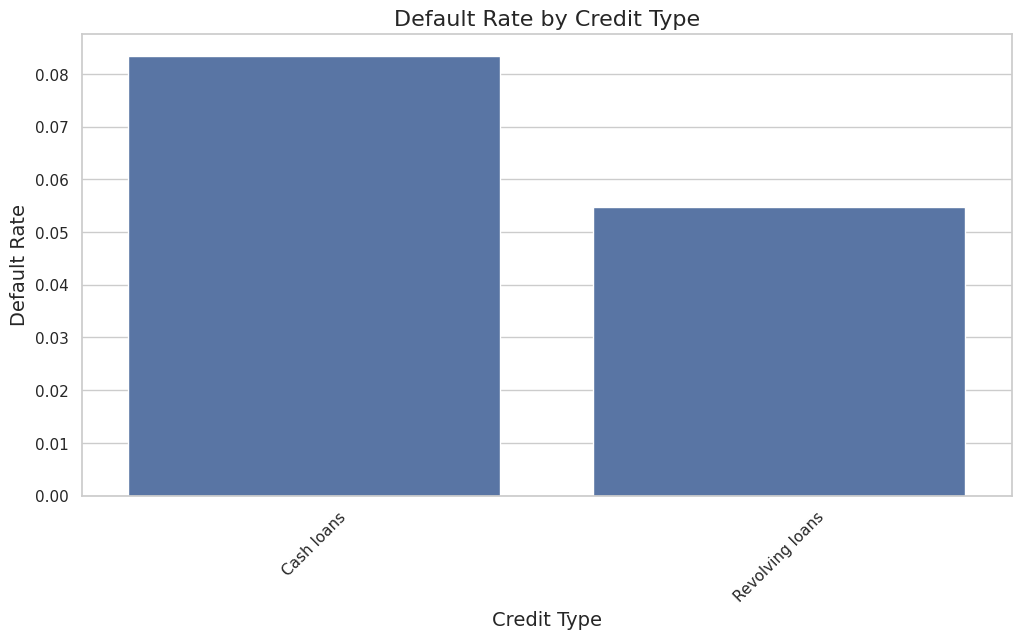


New Question: Why do revolving loans have higher default rates?
Is this due to different risk profiles or product features?


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

def load_data():
    """Load and prepare the dataset"""
    df = pd.read_csv('application_train.csv')

    # Create age feature from days birth
    df['AGE'] = df['DAYS_BIRTH'] / -365

    # Create debt-to-income ratio
    df['DEBT_TO_INCOME'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

    # Create flag for missing values
    df['DAYS_EMPLOYED_MISSING'] = df['DAYS_EMPLOYED'].isnull().astype(int)

    # Fix anomalous value in employment days
    df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)

    return df

def plot_target_by_age(df):
    # Visualize default rate by age
    plt.figure(figsize=(12, 6))

    # Create age bins
    df['AGE_BIN'] = pd.cut(df['AGE'], bins=np.linspace(20, 70, 11))

    # Calculate default rate by age
    age_analysis = df.groupby('AGE_BIN')['TARGET'].mean().reset_index()

    # Plot
    sns.barplot(x='AGE_BIN', y='TARGET', data=age_analysis, palette='viridis')
    plt.title('Default Rate by Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Default Rate', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

    # New question identified:
    print("\nNew Question: Why do younger applicants have higher default rates?")
    print("Is this due to less stable employment or different loan purposes?")

def plot_income_vs_credit(df):
    # Analyze income vs credit amount relationship
    plt.figure(figsize=(12, 6))

    # Sample for better visualization
    sample_df = df.sample(5000)

    # Plot with target differentiation
    sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT',
                    hue='TARGET', data=sample_df, alpha=0.6)
    plt.title('Income vs Credit Amount by Repayment Status', fontsize=16)
    plt.xlabel('Total Income', fontsize=14)
    plt.ylabel('Credit Amount', fontsize=14)
    plt.xlim(0, 1e6)
    plt.ylim(0, 3e6)
    plt.show()

    # New question identified:
    print("\nNew Question: What's the optimal credit-to-income ratio threshold?")
    print("Should we create different risk models for different income brackets?")

def plot_debt_to_income(df):
    """Analyze debt-to-income ratio by target"""
    plt.figure(figsize=(12, 6))

    # Filter extreme values for better visualization
    filtered = df[(df['DEBT_TO_INCOME'] < 20) & (df['AMT_INCOME_TOTAL'] < 2e6)]

    sns.boxplot(x='TARGET', y='DEBT_TO_INCOME', data=filtered)
    plt.title('Debt-to-Income Ratio by Repayment Status', fontsize=16)
    plt.xlabel('Repayment Status (0=Paid, 1=Default)', fontsize=14)
    plt.ylabel('Debt-to-Income Ratio', fontsize=14)
    plt.show()

    # Statistical test
    paid = filtered[filtered['TARGET'] == 0]['DEBT_TO_INCOME']
    default = filtered[filtered['TARGET'] == 1]['DEBT_TO_INCOME']
    t_stat, p_val = stats.ttest_ind(paid, default, nan_policy='omit')

    print(f"\nT-test results: t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")
    print("The difference in debt-to-income ratios is statistically significant")

def plot_employment_status(df):
    """Analyze employment status impact"""
    plt.figure(figsize=(12, 6))

    # Create employment status categories - FIXED VERSION
    df['EMP_STATUS'] = 'Unknown'  # Initialize with default value
    df.loc[df['DAYS_EMPLOYED'] < -365*5, 'EMP_STATUS'] = 'Employed >5yrs'
    df.loc[(df['DAYS_EMPLOYED'] >= -365*5) & (df['DAYS_EMPLOYED'] < 0), 'EMP_STATUS'] = 'Employed <5yrs'
    df.loc[df['DAYS_EMPLOYED'].isna(), 'EMP_STATUS'] = 'Missing'
    df.loc[df['DAYS_EMPLOYED'] >= 0, 'EMP_STATUS'] = 'Anomalous'

    # Calculate default rates
    emp_analysis = df.groupby('EMP_STATUS')['TARGET'].mean().reset_index()

    # Define order for consistent plotting
    status_order = ['Employed >5yrs', 'Employed <5yrs', 'Anomalous', 'Missing', 'Unknown']

    # Plot
    sns.barplot(x='EMP_STATUS', y='TARGET', data=emp_analysis,
                order=status_order, palette='viridis')
    plt.title('Default Rate by Employment Status', fontsize=16)
    plt.xlabel('Employment Status', fontsize=14)
    plt.ylabel('Default Rate', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

    # New question identified:
    print("\nNew Question: Why do applicants with missing employment data have higher risk?")
    print("Is employment data missing for specific occupations or income types?")

def plot_credit_type_analysis(df):
    """Analyze credit types and default rates"""
    plt.figure(figsize=(12, 6))

    # Analyze by contract type
    contract_analysis = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(['mean', 'count'])
    contract_analysis.columns = ['Default Rate', 'Count']
    contract_analysis = contract_analysis.sort_values('Default Rate', ascending=False)

    # Display table
    print("\nCredit Type Analysis:")
    print(contract_analysis)

    # Plot
    sns.barplot(x=contract_analysis.index, y='Default Rate', data=contract_analysis)
    plt.title('Default Rate by Credit Type', fontsize=16)
    plt.xlabel('Credit Type', fontsize=14)
    plt.ylabel('Default Rate', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

    # New question identified:
    print("\nNew Question: Why do revolving loans have higher default rates?")
    print("Is this due to different risk profiles or product features?")

def main():
    print("=== Problem 4: Data Exploration ===")
    df = load_data()

    # 1. Default rate by age
    print("\n1. Analyzing Default Rates by Age...")
    plot_target_by_age(df)

    # Income vs credit amount
    print("\n2. Analyzing Income vs Credit Amount...")
    plot_income_vs_credit(df)

    # Debt-to-income ratio
    print("\n3. Analyzing Debt-to-Income Ratios...")
    plot_debt_to_income(df)

    # Employment status impact - FIXED VERSION
    print("\n4. Analyzing Employment Status Impact...")
    plot_employment_status(df)

    # Credit type analysis
    print("\n5. Analyzing Credit Types...")
    plot_credit_type_analysis(df)

if __name__ == "__main__":
    main()